# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [104]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

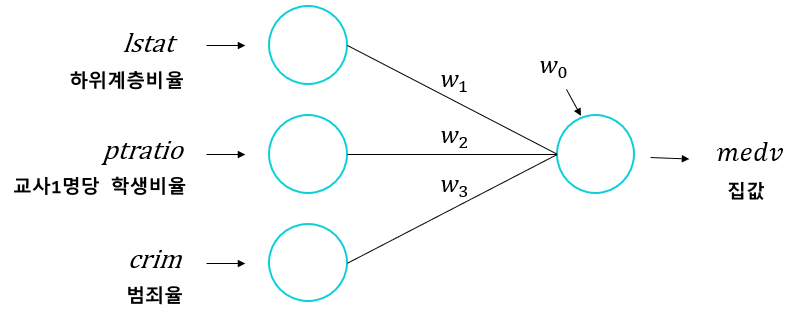

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [105]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [106]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [107]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [108]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [109]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential(Dense(1, input_shape=(nfeatures, )))

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [110]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [111]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 [==============================] - 1s 21ms/step - loss: 537.3321 - val_loss: 545.0346
Epoch 2/30
11/11 [==============================] - 0s 6ms/step - loss: 458.1935 - val_loss: 470.6110
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 390.6183 - val_loss: 408.0243
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 335.2149 - val_loss: 357.5198
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 291.4155 - val_loss: 317.0526
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 257.2842 - val_loss: 284.7603
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 228.7324 - val_loss: 259.3686
Epoch 8/30
11/11 [==============================] - 0s 6ms/step - loss: 207.5937 - val_loss: 239.7387
Epoch 9/30
11/11 [==============================] - 0s 7ms/step - loss: 191.3622 - val_loss: 225.5150
Epoch 10/30
11/11 [==============================] - 0s 7ms/step - loss: 179.7046

* 학습결과 그래프

In [112]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

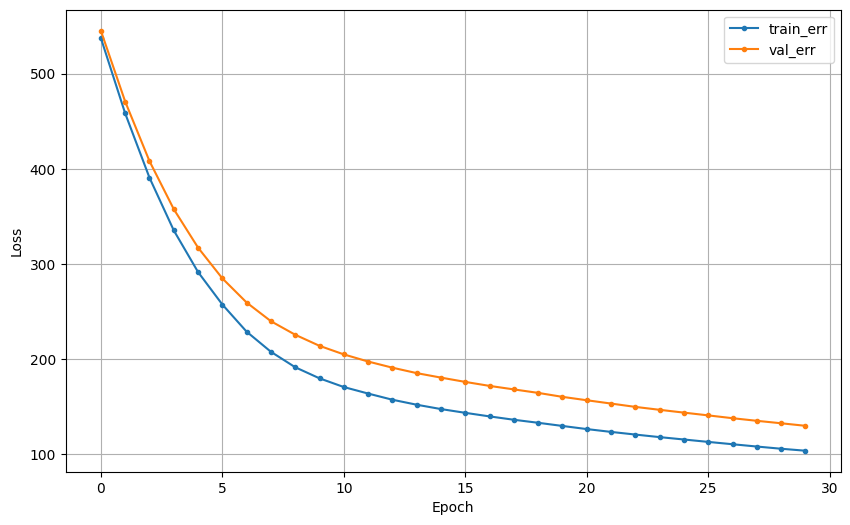

In [113]:
dl_history_plot(history)

### (3) 예측 및 검증

In [114]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [115]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 8.78881705626435
MAE  : 5.887034737830068
MAPE : 0.3023121222316955


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [116]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [117]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [118]:
nfeatures = x_train.shape[1]
nfeatures

12

In [119]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential(Dense(1, input_shape=(nfeatures, )))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [120]:
model2.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [121]:
history = model2.fit(x_train, y_train, epochs=30, validation_split=0.2).history

Epoch 1/30
11/11 [==============================] - 1s 20ms/step - loss: 490.4791 - val_loss: 431.2885
Epoch 2/30
11/11 [==============================] - 0s 7ms/step - loss: 323.0220 - val_loss: 298.6338
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 222.4990 - val_loss: 226.3566
Epoch 4/30
11/11 [==============================] - 0s 8ms/step - loss: 175.5517 - val_loss: 192.2541
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 154.4986 - val_loss: 172.8634
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 139.5909 - val_loss: 157.7119
Epoch 7/30
11/11 [==============================] - 0s 8ms/step - loss: 128.2212 - val_loss: 144.7238
Epoch 8/30
11/11 [==============================] - 0s 9ms/step - loss: 118.6144 - val_loss: 132.4062
Epoch 9/30
11/11 [==============================] - 0s 5ms/step - loss: 110.4484 - val_loss: 122.2436
Epoch 10/30
11/11 [==============================] - 0s 10ms/step - loss: 102.816

* 학습결과 그래프

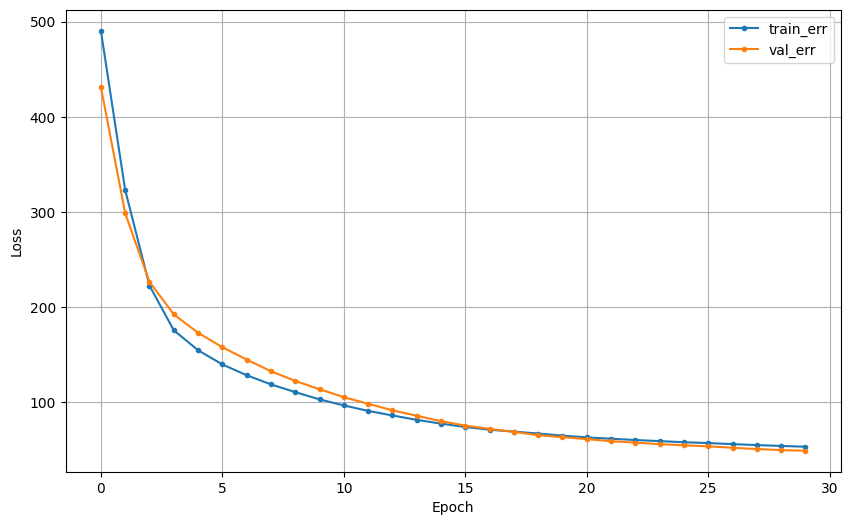

In [122]:
dl_history_plot(history)

* 예측 및 평가

In [123]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 6.323932984535977
MAE  : 4.669961540371766
MAPE : 0.23320100293934218


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [124]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [125]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [126]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [127]:
clear_session()

model = Sequential(Dense(1, input_shape=(nfeatures,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [128]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')

* 학습

In [129]:
history = model.fit(x_train, y_train, epochs=400, validation_split=0.2).history

Epoch 1/400
11/11 [==============================] - 1s 20ms/step - loss: 559.4179 - val_loss: 550.4636
Epoch 2/400
11/11 [==============================] - 0s 5ms/step - loss: 454.6955 - val_loss: 453.4667
Epoch 3/400
11/11 [==============================] - 0s 6ms/step - loss: 370.4718 - val_loss: 376.1811
Epoch 4/400
11/11 [==============================] - 0s 5ms/step - loss: 304.1163 - val_loss: 317.7813
Epoch 5/400
11/11 [==============================] - 0s 5ms/step - loss: 254.9352 - val_loss: 274.2327
Epoch 6/400
11/11 [==============================] - 0s 4ms/step - loss: 219.7099 - val_loss: 242.8871
Epoch 7/400
11/11 [==============================] - 0s 6ms/step - loss: 194.7701 - val_loss: 220.6246
Epoch 8/400
11/11 [==============================] - 0s 6ms/step - loss: 178.2947 - val_loss: 204.1983
Epoch 9/400
11/11 [==============================] - 0s 6ms/step - loss: 165.3096 - val_loss: 191.7698
Epoch 10/400
11/11 [==============================] - 0s 7ms/step - loss

* 학습결과 그래프

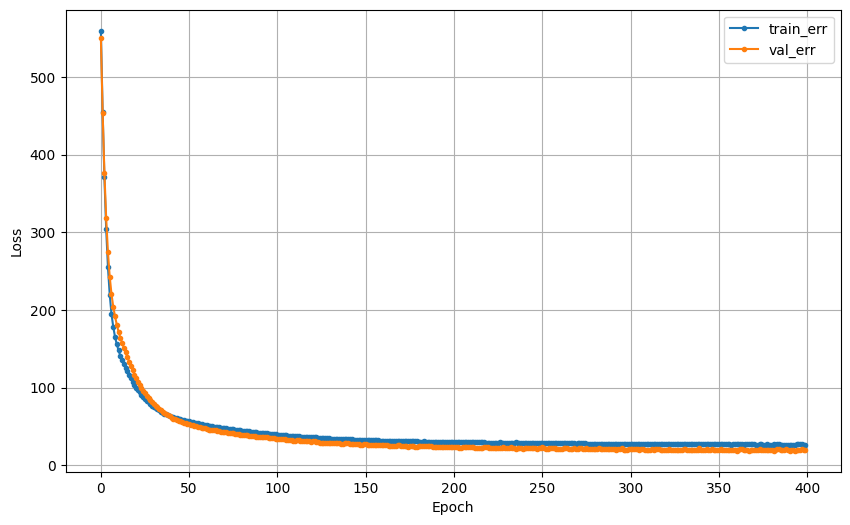

In [130]:
dl_history_plot(history)

* 예측 및 평가

In [131]:
pred = model.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.405328821764633
MAE  : 3.4465276979932606
MAPE : 0.18601718683697183


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [132]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [133]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [134]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [135]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(레이어 여러 개 입력은 리스트로)
model3 = Sequential([  Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                       Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [136]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [137]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 31ms/step - loss: 491.1427 - val_loss: 340.8111
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 191.7237 - val_loss: 211.3145
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 178.6162 - val_loss: 140.6107
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 110.2992 - val_loss: 115.0149
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 91.9957 - val_loss: 80.5940
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 74.7975 - val_loss: 66.8797
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 67.0380 - val_loss: 58.5195
Epoch 8/50
11/11 [==============================] - 0s 10ms/step - loss: 62.8303 - val_loss: 53.0056
Epoch 9/50
11/11 [==============================] - 0s 9ms/step - loss: 58.5484 - val_loss: 48.1174
Epoch 10/50
11/11 [==============================] - 0s 10ms/step - loss: 55.4749 - val_l

* 학습결과 그래프

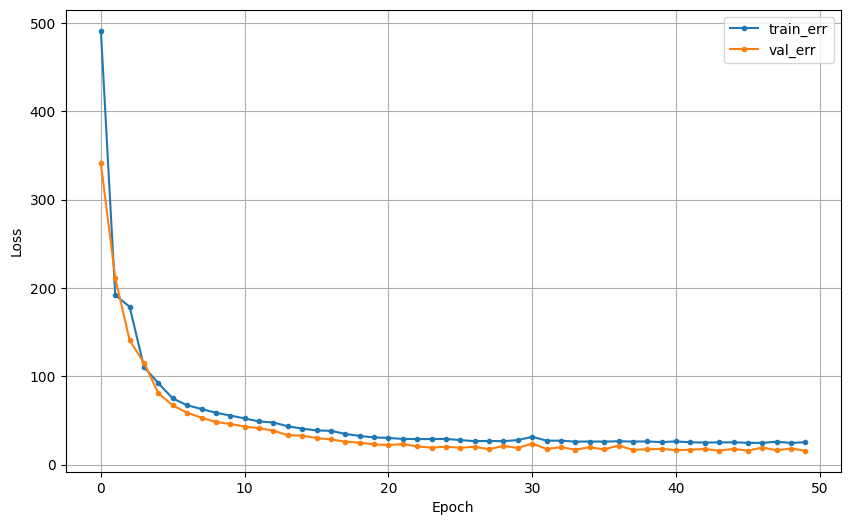

In [138]:
dl_history_plot(hist)

* 예측 및 평가

In [139]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.699808163986021
MAE  : 3.706943528792438
MAPE : 0.19443686123755868


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [157]:
clear_session()
model4 = Sequential([Dense(8, input_shape=(nfeatures,), activation='relu'),
                     Dense(1)])
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [158]:
model4.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [159]:
hist = model4.fit(x_train, y_train, epochs=50, validation_split=.2).history

Epoch 1/50
11/11 [==============================] - 1s 19ms/step - loss: 383.0636 - val_loss: 201.0869
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 169.1444 - val_loss: 128.3255
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 98.5883 - val_loss: 83.5673
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 73.5819 - val_loss: 56.3255
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 63.0310 - val_loss: 49.9497
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 61.1851 - val_loss: 41.3353
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 50.8682 - val_loss: 39.4664
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 46.1166 - val_loss: 34.7737
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 41.3660 - val_loss: 29.4605
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 38.2902 - val_loss: 24

* 학습곡선

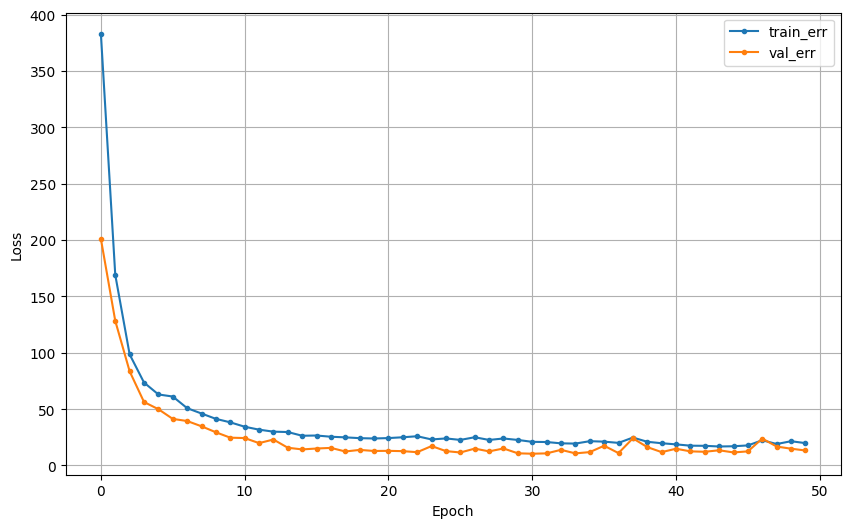

In [160]:
dl_history_plot(hist)

* 검증

In [161]:
pred4 = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred4, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred4)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred4)}')

4/4 [==============================] - 0s 5ms/step
RMSE : 4.160732552691288
MAE  : 2.983863105025946
MAPE : 0.16448600164293875


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [162]:
clear_session()
model5 = Sequential([Dense(8, input_shape=(nfeatures,), activation='relu'),
                     Dense(4, activation='relu'),
                     Dense(1)])
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [163]:
model5.compile(optimizer=Adam(learning_rate=0.1), loss='mse')
hist = model5.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=0).history

* 학습곡선

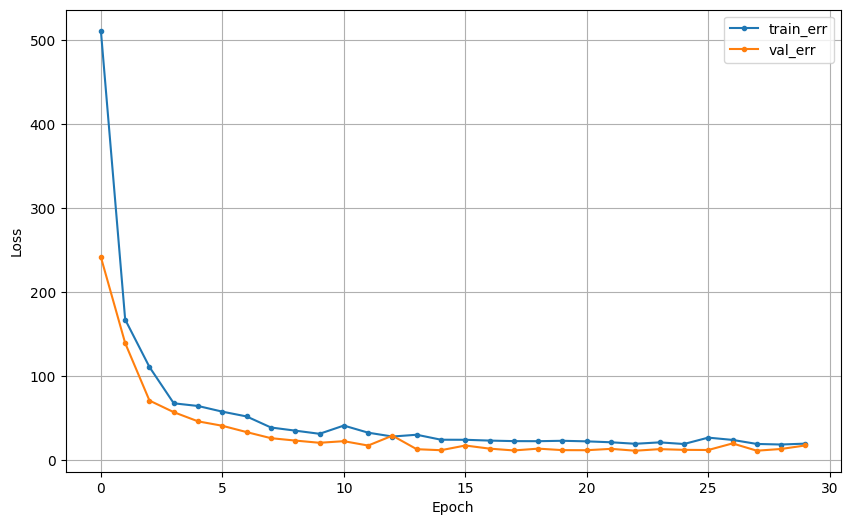

In [164]:
dl_history_plot(hist)

* 검증

In [165]:
pred5 = model5.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred5, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred5)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred5)}')

4/4 [==============================] - 0s 4ms/step
RMSE : 4.230204230487004
MAE  : 3.094265466577866
MAPE : 0.15411528376110029


In [168]:
# def visualization_result(y_val,pred):
#   sns.scatterplot(x=pred.reshape(-1), y=y_val.values)
#   # sns.lineplot(pred.reshape(pred.shape[0],), label='pred')
#   plt.legend(loc='upper right')
#   plt.show()
#   visualization_result(y_val,pred)

In [170]:
# visualization_result(y_val, pred5)